In [19]:
import requests
import pandas as pd
import numpy as np
import mplfinance as mpf
import datetime

In [20]:
url = "https://api.upbit.com/v1/market/all"
querystring = {"isDetails":"false"}
response = requests.request("GET", url, params=querystring)
market = response.json()
for i in market:
    if i['korean_name'] == '엔진코인':
        if 'KRW' in i['market'] :
            pair = i['market']
#KRW-ENJ

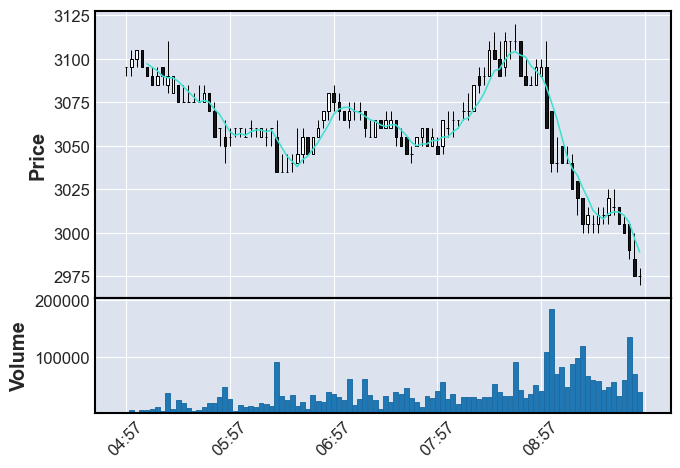

In [57]:
url = "https://api.upbit.com/v1/candles/minutes/3"
querystring = {"market":pair,"count":"200"}
response = requests.request("GET", url, params=querystring)
minutes = response.json()
enjin_df = pd.DataFrame(columns=['Open','High','Low','Close','Volume'])
for idx in reversed(minutes):
    enjin_df.loc[datetime.datetime.strptime(idx['candle_date_time_kst'],'%Y-%m-%dT%H:%M:%S')] = [idx['opening_price'],idx['high_price'],idx['low_price'],idx['trade_price'],idx['candle_acc_trade_volume']]

mpf.plot(enjin_df[100:],type='candle',mav=5,volume=True)

In [43]:
mav5 = []

for i in range(len(enjin_df)):
    if i < 4 :
        mav5.append(0)
    else:
        mav5.append((enjin_df.iloc[i-4]['Close']+enjin_df.iloc[i-3]['Close']+enjin_df.iloc[i-2]['Close']+enjin_df.iloc[i-1]['Close']+enjin_df.iloc[i]['Close']) / 5)

In [ ]:
#https://github.com/matplotlib/mplfinance/blob/master/examples/addplot.ipynb
#https://github.com/matplotlib/mplfinance